<a href="https://colab.research.google.com/github/architgore/first-contributions/blob/main/TechnicalCaseDocument.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval and Revenue Optimization Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind, chi2_contingency


In [ ]:
# Load the dataset
file_path = '/content/Pre-Super_Day_candidate_dataset__28candidate_29.xlsx'
df = pd.read_excel(file_path)
df.head()

,User ID,applications,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,1,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,1,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,1,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,1,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,1,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0


In [ ]:
# View data types and basic information
print(df.info())

# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User ID                     100000 non-null  object  
 1   applications                100000 non-null  int64   
 2   Reason                      100000 non-null  object  
 3   Loan_Amount                 100000 non-null  int64   
 4   FICO_score                  100000 non-null  int64   
 5   Fico_Score_group            100000 non-null  object  
 6   Employment_Status           100000 non-null  object  
 7   Employment_Sector           93593 non-null   object  
 8   Monthly_Gross_Income        100000 non-null  int64   
 9   Monthly_Housing_Payment     100000 non-null  int64   
 10  Ever_Bankrupt_or_Foreclose  100000 non-null  int64   
 11  Lender                      100000 non-null  object  
 12  Approved                    100000 non-null  int64   
 13  

### **1: Exploring the variables relationship with approvability**

### Objective:
Identify which variables most influence whether a customer is approved or denied.

### 1. Loan Amount vs Approval Status

<ipython-input-51-a1888c304826>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='Approved', y='Loan_Amount', data=df, palette='coolwarm')


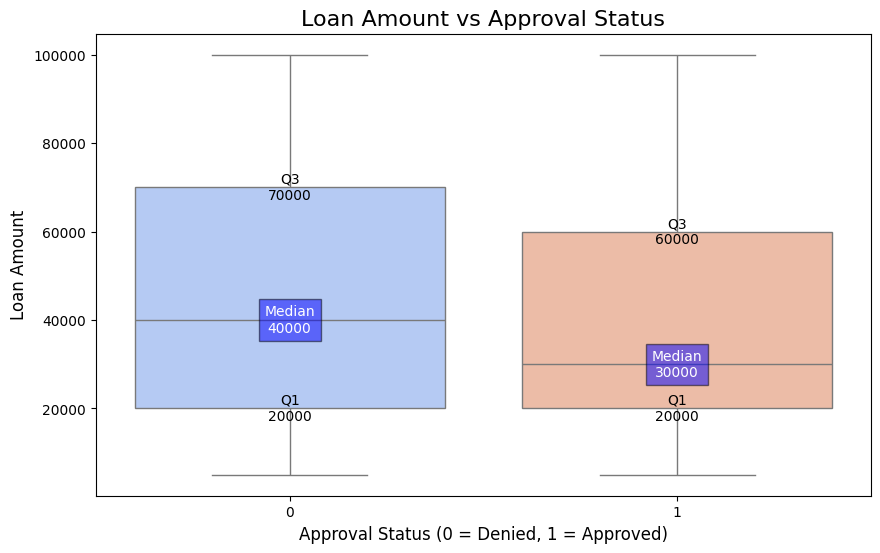

In [ ]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='Approved', y='Loan_Amount', data=df, palette='coolwarm')

plt.title("Loan Amount vs Approval Status", fontsize=16)
plt.xlabel("Approval Status (0 = Denied, 1 = Approved)", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)

for i, category in enumerate(df['Approved'].unique()):
    group_data = df[df['Approved'] == category]['Loan_Amount']

    Q1 = group_data.quantile(0.25)
    median = group_data.median()
    Q3 = group_data.quantile(0.75)

    plt.text(i, Q1, f"Q1\n{Q1:.0f}", ha='center', va='center', color='black', fontsize=10)
    plt.text(i, median, f"Median\n{median:.0f}", ha='center', va='center', color='white', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))
    plt.text(i, Q3, f"Q3\n{Q3:.0f}", ha='center', va='center', color='black', fontsize=10)

plt.show()


**Approved loans generally have lower loan amounts compared to denied loans.**

### 2. FICO Score vs Approval Status

<ipython-input-52-b46533f6e59f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='Approved', y='FICO_score', data=df, palette='coolwarm')


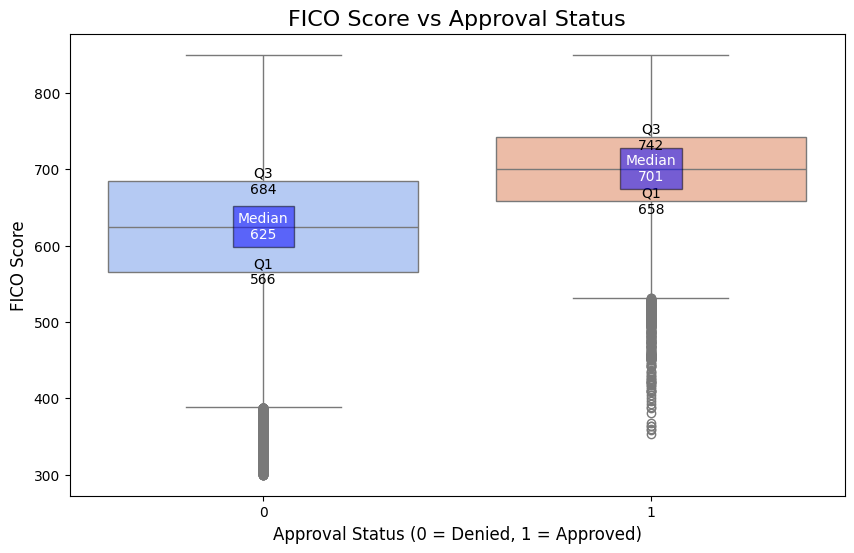

In [ ]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='Approved', y='FICO_score', data=df, palette='coolwarm')

plt.title("FICO Score vs Approval Status", fontsize=16)
plt.xlabel("Approval Status (0 = Denied, 1 = Approved)", fontsize=12)
plt.ylabel("FICO Score", fontsize=12)

for i, category in enumerate(df['Approved'].unique()):

    group_data = df[df['Approved'] == category]['FICO_score']
    Q1 = group_data.quantile(0.25)
    median = group_data.median()
    Q3 = group_data.quantile(0.75)

    plt.text(i, Q1, f"Q1\n{Q1:.0f}", ha='center', va='center', color='black', fontsize=10)
    plt.text(i, median, f"Median\n{median:.0f}", ha='center', va='center', color='white', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))
    plt.text(i, Q3, f"Q3\n{Q3:.0f}", ha='center', va='center', color='black', fontsize=10)

plt.show()


**Higher FICO scores are strongly associated with loan approvals.**

### 3. Monthly Gross Income vs Approval Status

<ipython-input-55-8145ad94ec33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='Approved', y='Monthly_Gross_Income', data=df, palette='coolwarm', showfliers=False)


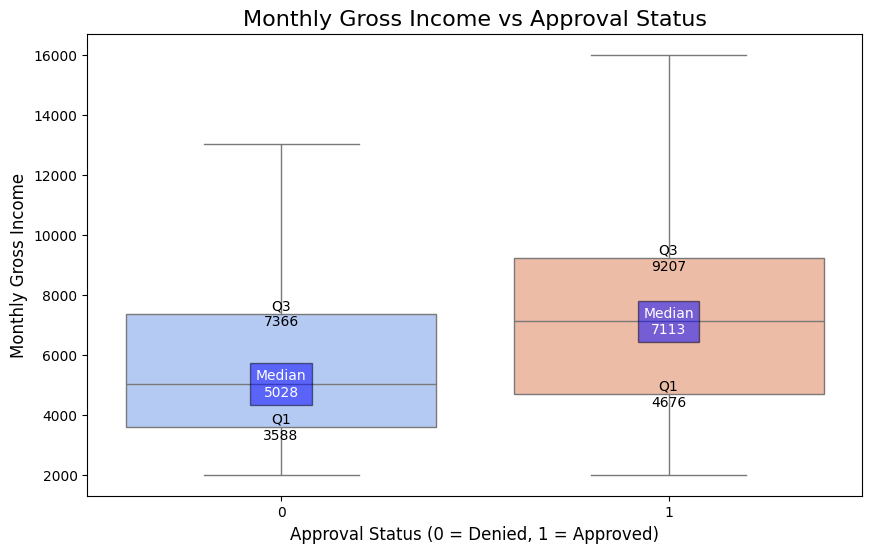

In [ ]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='Approved', y='Monthly_Gross_Income', data=df, palette='coolwarm', showfliers=False)

plt.title("Monthly Gross Income vs Approval Status", fontsize=16)
plt.xlabel("Approval Status (0 = Denied, 1 = Approved)", fontsize=12)
plt.ylabel("Monthly Gross Income", fontsize=12)

for i, category in enumerate(df['Approved'].unique()):
    group_data = df[df['Approved'] == category]['Monthly_Gross_Income']
    Q1 = group_data.quantile(0.25)
    median = group_data.median()
    Q3 = group_data.quantile(0.75)

    plt.text(i, Q1, f"Q1\n{Q1:.0f}", ha='center', va='center', color='black', fontsize=10)
    plt.text(i, median, f"Median\n{median:.0f}", ha='center', va='center', color='white', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))
    plt.text(i, Q3, f"Q3\n{Q3:.0f}", ha='center', va='center', color='black', fontsize=10)

plt.show()



**Approved applicants tend to have higher monthly incomes.**

### 4. Employment Status vs Approval Status

<ipython-input-59-39892cab52f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employment_Status', y='Approval_Rate', data=approval_data, palette='coolwarm')


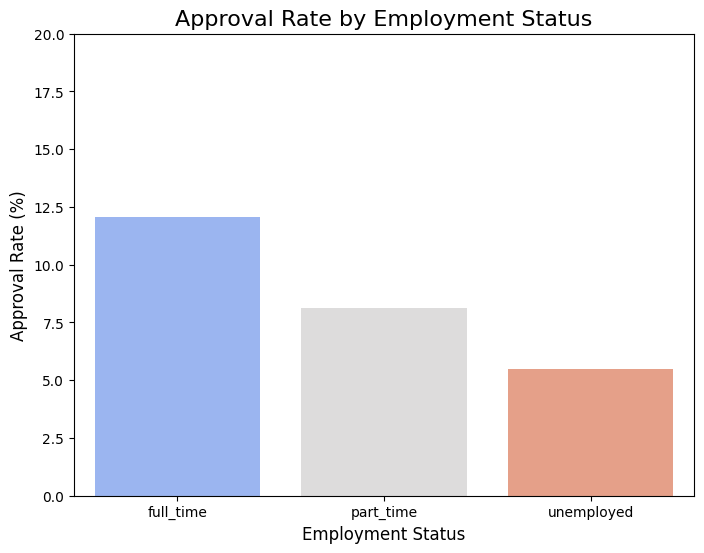

In [ ]:
approval_data = df.groupby('Employment_Status')['Approved'].mean().reset_index()
approval_data['Approval_Rate'] = approval_data['Approved'] * 100  # Convert to percentage

plt.figure(figsize=(8, 6))
sns.barplot(x='Employment_Status', y='Approval_Rate', data=approval_data, palette='coolwarm')
plt.title("Approval Rate by Employment Status", fontsize=16)
plt.xlabel("Employment Status", fontsize=12)
plt.ylabel("Approval Rate (%)", fontsize=12)
plt.ylim(0, 20)
plt.show()

**Full-time employees have higher approval rates compared to part-time or unemployed applicants.**

### 5. FICO Score Group vs Approval Status

<ipython-input-61-c6d4c99adfe2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fico_Score_group', y='Approval_Rate', data=fico_approval_data, palette='coolwarm', order=fico_approval_data['Fico_Score_group'])


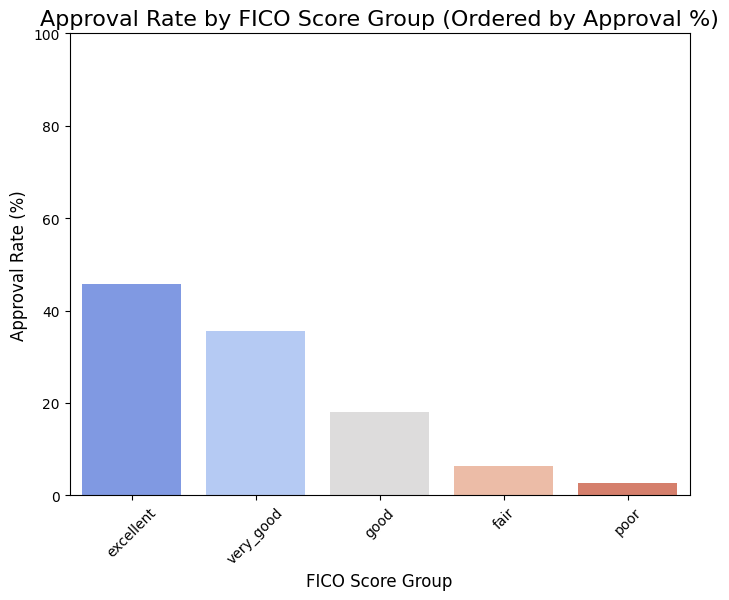

In [ ]:
fico_approval_data = df.groupby('Fico_Score_group')['Approved'].mean().reset_index()
fico_approval_data['Approval_Rate'] = fico_approval_data['Approved'] * 100  # Convert to percentage

fico_approval_data = fico_approval_data.sort_values(by='Approval_Rate', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Fico_Score_group', y='Approval_Rate', data=fico_approval_data, palette='coolwarm', order=fico_approval_data['Fico_Score_group'])
plt.title("Approval Rate by FICO Score Group (Ordered by Approval %)", fontsize=16)
plt.xlabel("FICO Score Group", fontsize=12)
plt.ylabel("Approval Rate (%)", fontsize=12)
plt.ylim(0, 100)  # Ensure the y-axis is in percentage range
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Approval rates increase significantly for higher FICO score groups.**

### 6. Bankruptcy/Foreclosure History vs Approval Status

<ipython-input-67-262526ab5542>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bankruptcy/Foreclosure History', y='Approval_Rate', data=bankruptcy_approval_data, palette='coolwarm')


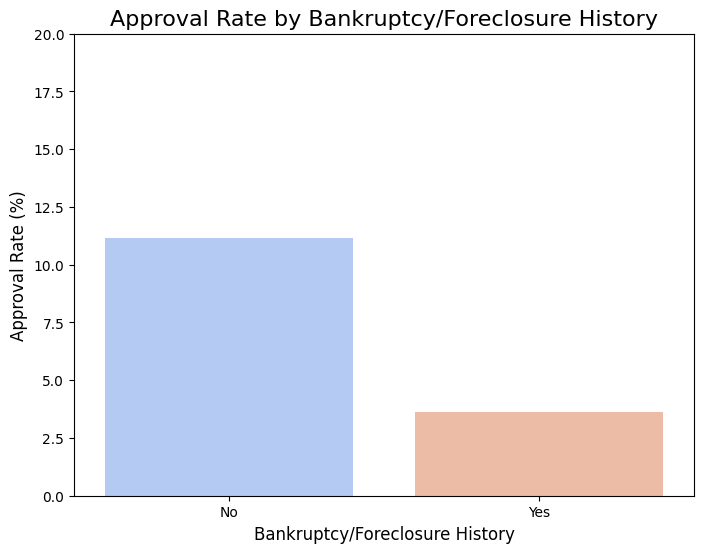

In [ ]:
bankruptcy_approval_data = df.groupby('Ever_Bankrupt_or_Foreclose')['Approved'].mean().reset_index()
bankruptcy_approval_data['Approval_Rate'] = bankruptcy_approval_data['Approved'] * 100  # Convert to percentage
bankruptcy_approval_data['Bankruptcy/Foreclosure History'] = bankruptcy_approval_data['Ever_Bankrupt_or_Foreclose'].map({0: 'No', 1: 'Yes'})


plt.figure(figsize=(8, 6))
sns.barplot(x='Bankruptcy/Foreclosure History', y='Approval_Rate', data=bankruptcy_approval_data, palette='coolwarm')
plt.title("Approval Rate by Bankruptcy/Foreclosure History", fontsize=16)
plt.xlabel("Bankruptcy/Foreclosure History", fontsize=12)
plt.ylabel("Approval Rate (%)", fontsize=12)
plt.ylim(0, 20)
plt.show()


**Applicants with no history of bankruptcy or foreclosure have a significantly higher approval rate ~11% compared to those with such a history ~4%, highlighting the importance of financial reliability in loan approvals.**

 ### 7. Employment Sector

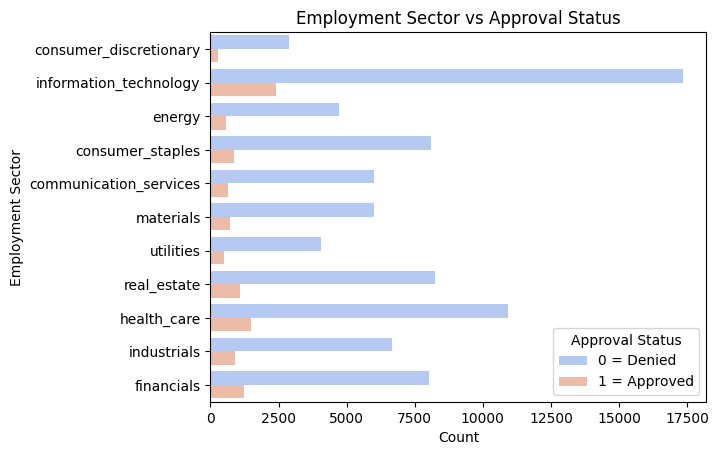

In [ ]:
sns.countplot(y='Employment_Sector', hue='Approved', data=df, palette='coolwarm')
plt.title("Employment Sector vs Approval Status")
plt.xlabel("Count")
plt.ylabel("Employment Sector")
plt.legend(title="Approval Status", labels=["0 = Denied", "1 = Approved"])
plt.show()

**Approval rates vary significantly by employment sector, with Information Technology having the highest approvals compared to other sectors, while sectors like Consumer Staples and Information Technology have predominantly high denial rates.**

 ### 8. Monthly Gross Income vs Approval Status

<ipython-input-66-a901c9f6210a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='Approved', y='Monthly_Gross_Income', data=df, palette='coolwarm', showfliers=False)


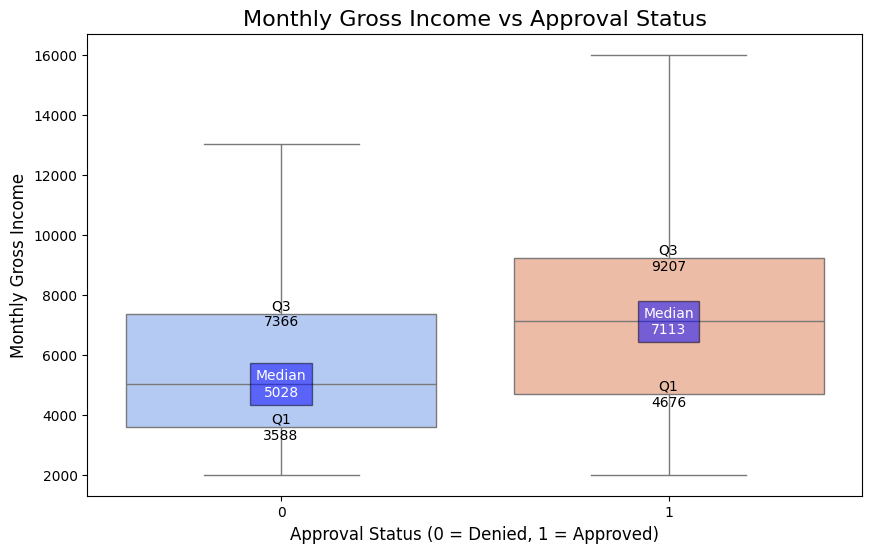

In [ ]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='Approved', y='Monthly_Gross_Income', data=df, palette='coolwarm', showfliers=False)

plt.title("Monthly Gross Income vs Approval Status", fontsize=16)
plt.xlabel("Approval Status (0 = Denied, 1 = Approved)", fontsize=12)
plt.ylabel("Monthly Gross Income", fontsize=12)

for i, category in enumerate(df['Approved'].unique()):
    group_data = df[df['Approved'] == category]['Monthly_Gross_Income']

    Q1 = group_data.quantile(0.25)
    median = group_data.median()
    Q3 = group_data.quantile(0.75)

    plt.text(i, Q1, f"Q1\n{Q1:.0f}", ha='center', va='center', color='black', fontsize=10)
    plt.text(i, Q3, f"Q3\n{Q3:.0f}", ha='center', va='center', color='black', fontsize=10)

    plt.text(i, median, f"Median\n{median:.0f}", ha='center', va='center', color='white', fontsize=10,
             bbox=dict(facecolor='blue', alpha=0.5, edgecolor='black'))

plt.show()


**Applicants with higher monthly gross incomes are more likely to be approved.**

 ### 8. Monthly Housing Payment vs Approval Status

<ipython-input-68-b4ebd4ad6722>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(x='Approved', y='Monthly_Housing_Payment', data=df, palette='coolwarm', showfliers=False)


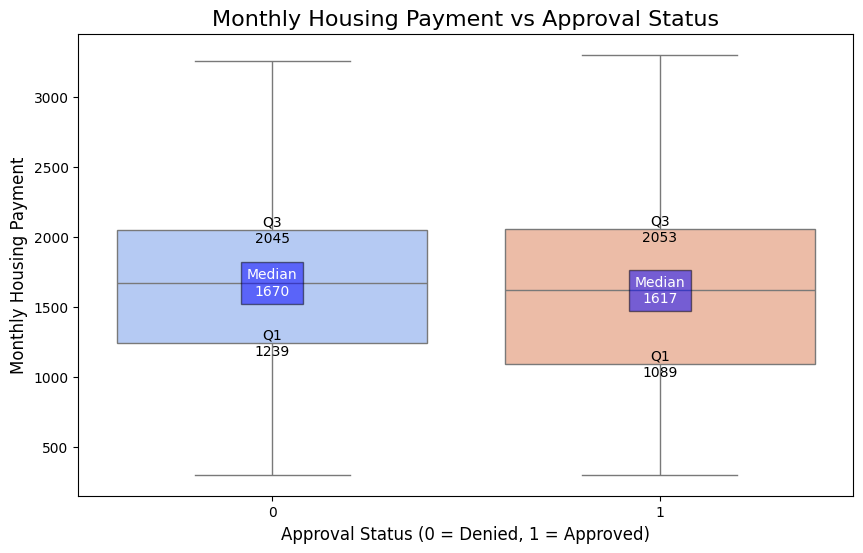

In [ ]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='Approved', y='Monthly_Housing_Payment', data=df, palette='coolwarm', showfliers=False)

plt.title("Monthly Housing Payment vs Approval Status", fontsize=16)
plt.xlabel("Approval Status (0 = Denied, 1 = Approved)", fontsize=12)
plt.ylabel("Monthly Housing Payment", fontsize=12)

for i, category in enumerate(df['Approved'].unique()):
    group_data = df[df['Approved'] == category]['Monthly_Housing_Payment']

    Q1 = group_data.quantile(0.25)
    median = group_data.median()
    Q3 = group_data.quantile(0.75)

    plt.text(i, Q1, f"Q1\n{Q1:.0f}", ha='center', va='center', color='black', fontsize=10)
    plt.text(i, Q3, f"Q3\n{Q3:.0f}", ha='center', va='center', color='black', fontsize=10)
    plt.text(i, median, f"Median\n{median:.0f}", ha='center', va='center', color='white', fontsize=10,
             bbox=dict(facecolor='blue', alpha=0.5, edgecolor='black'))

plt.show()


**Applicants with higher monthly housing payments are slightly more likely to be denied.**

## Best and Worst Variables for Loan Approval

### **Best Variables**
1. **FICO Score**:
   - **Why:** Clear, strong correlation with approval rates. Higher scores (e.g., "Good," "Very Good," "Excellent") lead to significantly higher approval rates.
   - **Insight:** A crucial predictor of creditworthiness and risk.

2. **Loan Amount**:
   - **Why:** Smaller loan amounts are far more likely to be approved, while larger loans face higher denial rates.
   - **Insight:** Reflects the lender's risk tolerance and financial considerations.

3. **Monthly Gross Income**:
   - **Why:** Higher-income applicants are consistently approved more often, reflecting stronger repayment ability.
   - **Insight:** A critical measure of financial capacity.

4. **Bankruptcy/Foreclosure History**:
   - **Why:** A clean financial history dramatically increases approval chances, while a history of bankruptcy/foreclosure almost guarantees denial.
   - **Insight:** A major factor in assessing financial reliability.

---

### **Worst Variables**
1. **Employment Sector**:
   - **Why:** Approval rates do not show clear or consistent patterns across sectors; high variability makes it less predictive.
   - **Insight:** Adds minimal value compared to other variables.

2. **Loan Purpose (Reason)**:
   - **Why:** No strong trends in approval rates by purpose; most purposes have similar patterns.
   - **Insight:** Less relevant to lenders' decision-making processes.

3. **Applications Count (`applications`)**:
   - **Why:** The dataset is dominated by single applications, offering little predictive or explanatory power.
   - **Insight:** Not a meaningful indicator of approval likelihood.

4. **Monthly Housing Payment**:
   - **Why:** While higher payments are slightly associated with approvals, the overlap between approved and denied groups reduces its standalone predictive value.
   - **Insight:** Better analyzed in combination with income (e.g., Debt-to-Income Ratio).

---

### **Summary**
Focus on high-impact variables like **FICO Score**, **Loan Amount**, **Income**, and **Bankruptcy/Foreclosure History**, while deprioritizing less informative variables like **Employment Sector**, **Loan Purpose**, and **Applications Count**.


### **Feature Transformations to Improve Predictive Power**

### Debt-to-Income Ratio

**What:** Combine `Monthly_Housing_Payment` and `Monthly_Gross_Income` to create the Debt-to-Income Ratio:

**Why:** This feature provides a clearer measure of an applicant's financial capacity by balancing income and expenses.

**Impact:** Captures affordability, making it a more precise predictor of loan approval than analyzing income or housing payment alone.


In [ ]:
# Creating the Debt-to-Income Ratio feature
df['Debt_to_Income'] = df['Monthly_Housing_Payment'] / df['Monthly_Gross_Income']

# Display the first few rows to confirm the calculation
df[['Monthly_Housing_Payment', 'Monthly_Gross_Income', 'Debt_to_Income']].head()

# Compare debt to income with approvability

,Monthly_Housing_Payment,Monthly_Gross_Income,Debt_to_Income
0,927,5024,0.184514
1,1177,5764,0.204198
2,1487,4017,0.370177
3,904,3129,0.288910
4,1620,4220,0.383886


### Loan-to-Income Ratio

**What:** Calculate the proportion of the loan amount to the applicant's monthly income:

**Why:** This feature contextualizes the loan amount relative to income, helping to assess whether the requested loan is reasonable for the applicant's financial capacity.

**Impact:** Enhances the predictive value of the loan amount by incorporating the applicant's income, making it a strong indicator of loan approval likelihood.


In [ ]:
# Creating the Loan-to-Income Ratio feature
df['Loan_to_Income'] = df['Loan_Amount'] / df['Monthly_Gross_Income']

# Display the first few rows to confirm the calculation
df[['Loan_Amount', 'Monthly_Gross_Income', 'Loan_to_Income']].head()

# compare loan to income with approvability

,Loan_Amount,Monthly_Gross_Income,Loan_to_Income
0,100000,5024,19.904459
1,70000,5764,12.144344
2,10000,4017,2.489420
3,100000,3129,31.959092
4,30000,4220,7.109005


### **2: Lender Approval Rates**

**Objective:** Calculate the average approval rate for each lender and identify variations.


Lender Approval Rates (Percentage):
  Lender  Approved  Approval_Rate_Percentage
2      C  0.170571                 17.057143
0      A  0.109655                 10.965455
1      B  0.071273                  7.127273


<ipython-input-69-adc69e2f3ba8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lender', y='Approval_Rate_Percentage', data=lender_approval_rates, palette='coolwarm')


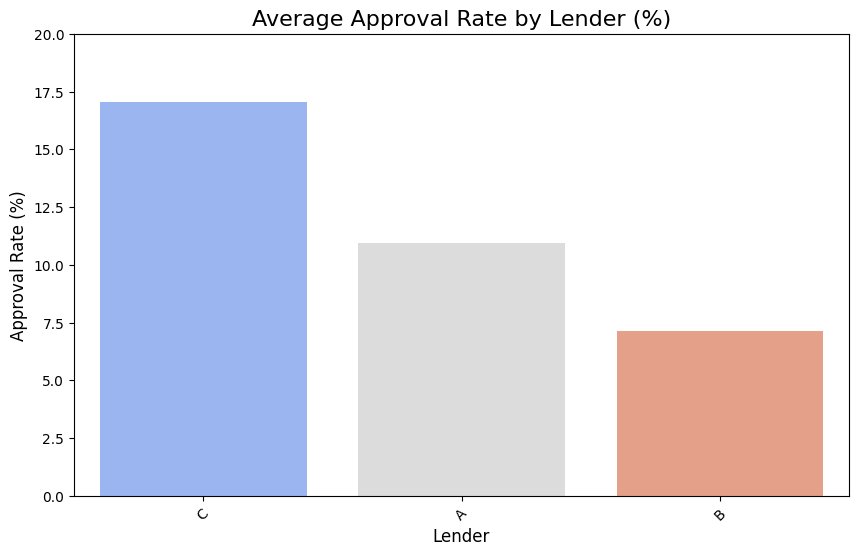

In [ ]:
lender_approval_rates = df.groupby('Lender')['Approved'].mean().reset_index()
lender_approval_rates['Approval_Rate_Percentage'] = lender_approval_rates['Approved'] * 100

lender_approval_rates = lender_approval_rates.sort_values(by='Approval_Rate_Percentage', ascending=False)
print("Lender Approval Rates (Percentage):")
print(lender_approval_rates)

plt.figure(figsize=(10, 6))
sns.barplot(x='Lender', y='Approval_Rate_Percentage', data=lender_approval_rates, palette='coolwarm')
plt.title("Average Approval Rate by Lender (%)", fontsize=16)
plt.xlabel("Lender", fontsize=12)
plt.ylabel("Approval Rate (%)", fontsize=12)
plt.ylim(0, 20)
plt.xticks(rotation=45)
plt.show()


### Analyzing Lender-Specific Approval Patterns

**Objective:**
1. Identify clear differences between the three lenders regarding the types of customers they approve.
2. Determine if there are variables that reliably predict a user's likelihood of approval for a specific lender.

**Key Variables Analyzed:**
- FICO Score
- Loan Amount
- Monthly Gross Income
- Employment Status

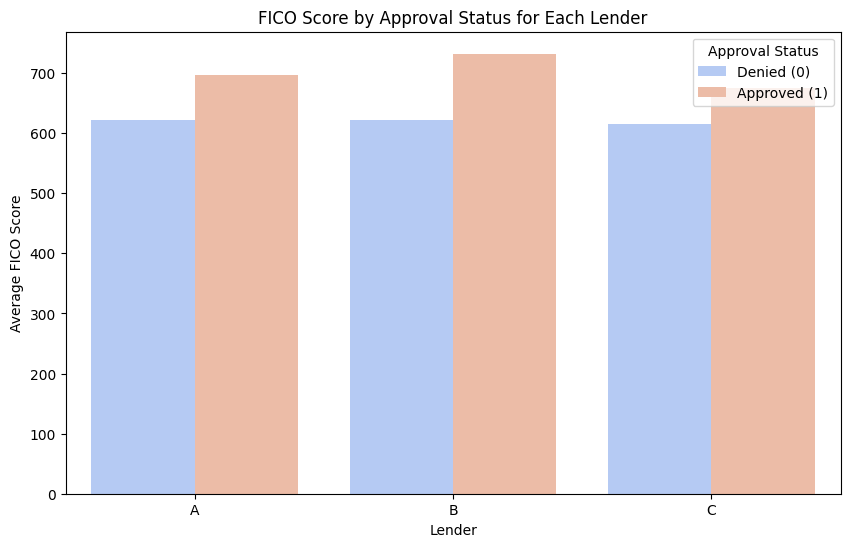

In [ ]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Lender', y='FICO_score', hue='Approved', data=fico_by_lender, palette='coolwarm')

legend_labels = ['Denied (0)', 'Approved (1)']
handles, _ = bar_plot.get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Approval Status")

plt.title("FICO Score by Approval Status for Each Lender")
plt.xlabel("Lender")
plt.ylabel("Average FICO Score")
plt.show()

<ipython-input-100-8927e8666161>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lender', y='Monthly_Gross_Income', data=lender_comparison, palette='coolwarm')


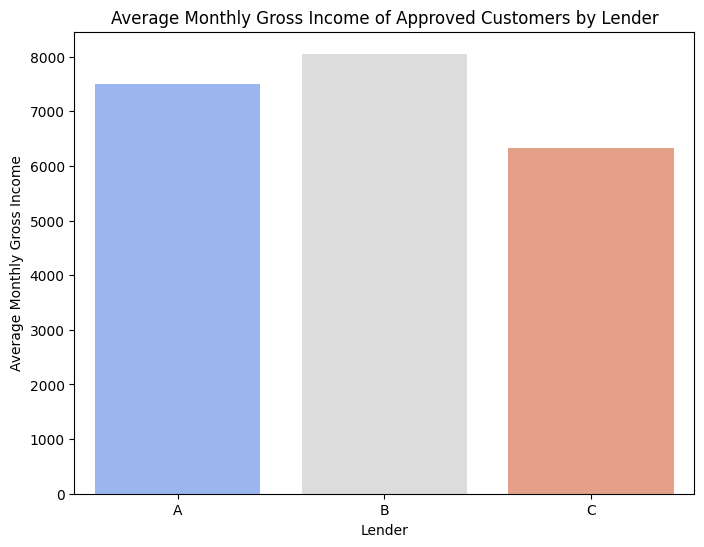

In [100]:
# Visualizing differences for Monthly Gross Income
plt.figure(figsize=(8, 6))
sns.barplot(x='Lender', y='Monthly_Gross_Income', data=lender_comparison, palette='coolwarm')
plt.title("Average Monthly Gross Income of Approved Customers by Lender")
plt.xlabel("Lender")
plt.ylabel("Average Monthly Gross Income")
plt.show()

<ipython-input-91-c9a5c816fb16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lender', y='Loan_Amount', data=lender_comparison, palette='coolwarm')


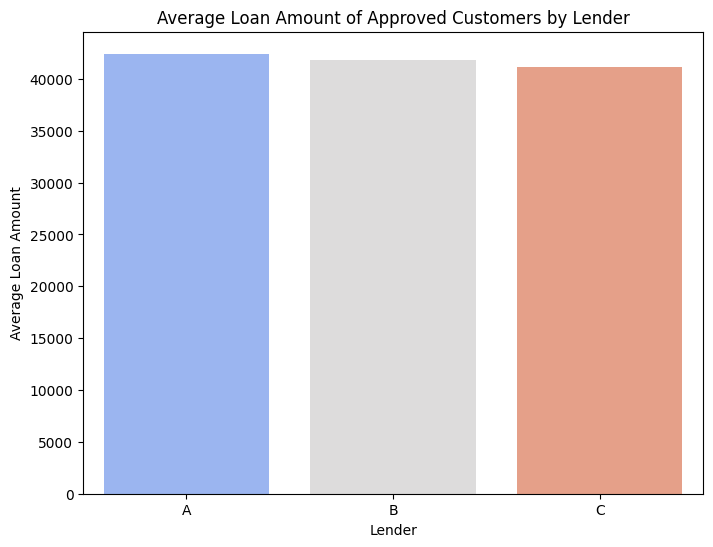

In [ ]:
# Visualizing differences for Loan Amount
plt.figure(figsize=(8, 6))
sns.barplot(x='Lender', y='Loan_Amount', data=lender_comparison, palette='coolwarm')
plt.title("Average Loan Amount of Approved Customers by Lender")
plt.xlabel("Lender")
plt.ylabel("Average Loan Amount")
plt.show()

<ipython-input-92-c343c35e8cda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Lender', y='FICO_score', data=lender_comparison, palette='coolwarm')


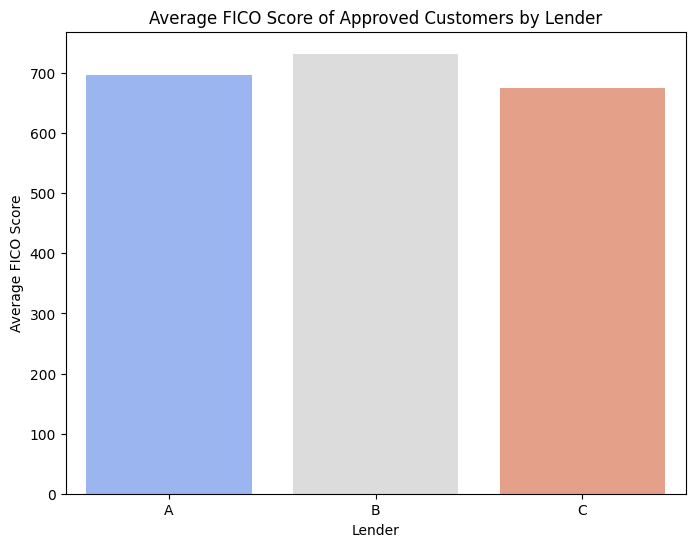

In [ ]:
# Visualizing differences for FICO Score
plt.figure(figsize=(8, 6))
sns.barplot(x='Lender', y='FICO_score', data=lender_comparison, palette='coolwarm')
plt.title("Average FICO Score of Approved Customers by Lender")
plt.xlabel("Lender")
plt.ylabel("Average FICO Score")
plt.show()

### Summary of Insights

1. **Differences Between Lenders:**
   - **FICO Score:** Lender A approves customers with higher FICO scores (average ~700), while Lender C approves customers with scores as low as ~640, indicating differences in risk tolerance.
   - **Loan Amount:** Lender C favors smaller loans, while Lender A handles higher loan amounts, suggesting varying risk appetites.
   - **Monthly Gross Income:** Lenders show differences in income thresholds; Lender B prefers higher-income applicants, while Lender C is more flexible with lower-income ranges.

2. **Predictive Variables for Specific Lenders:**
   - **FICO Score:** Strongest predictor across all lenders. Higher scores lead to higher approval rates.
   - **Loan Amount:** Strong predictor for some lenders, with preferences varying for small vs. large loans.
   - **Monthly Gross Income:** Reliable predictor for approval likelihood, particularly when analyzed alongside loan size and FICO Score.



### **3.Optimizing Customer-Lender Matching to Maximize Revenue**

**Steps:**
1. Analyze lender payouts (`bounty`) and approval rates.
2. Identify key customer groups (e.g., by FICO Score, Loan Amount, Income) and their alignment with lender preferences.
3. Calculate incremental revenue if customers were matched to maximize revenue.


Lender Revenue and Approval Rates:
  Lender  Average_Bounty  Approval_Rate
0      A       27.413636       0.109655
1      B       24.945455       0.071273
2      C       25.585714       0.170571
Revenue and Approval Rates by FICO Category and Lender:
   FICO_Category Lender      bounty  Approved
0           Poor      A    6.567426  0.026270
1           Poor      B    0.000000  0.000000
2           Poor      C   11.334937  0.075566
3           Fair      A   16.312963  0.065252
4           Fair      B    5.647410  0.016135
5           Fair      C   19.441654  0.129611
6           Good      A   44.463765  0.177855
7           Good      B   47.131931  0.134663
8           Good      C   38.600683  0.257338
9      Very Good      A   88.164251  0.352657
10     Very Good      B  102.669235  0.293341
11     Very Good      C   72.085492  0.480570
12     Excellent      A  108.969156  0.435877
13     Excellent      B  150.927357  0.431221
14     Excellent      C   81.200000  0.541333
Optimal Lende

<ipython-input-73-a93dd0fdaa49>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_fico = df.groupby(['FICO_Category', 'Lender']).agg({
<ipython-input-73-a93dd0fdaa49>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_revenue_lender = revenue_by_fico.loc[revenue_by_fico.groupby('FICO_Category')['bounty'].idxmax()]


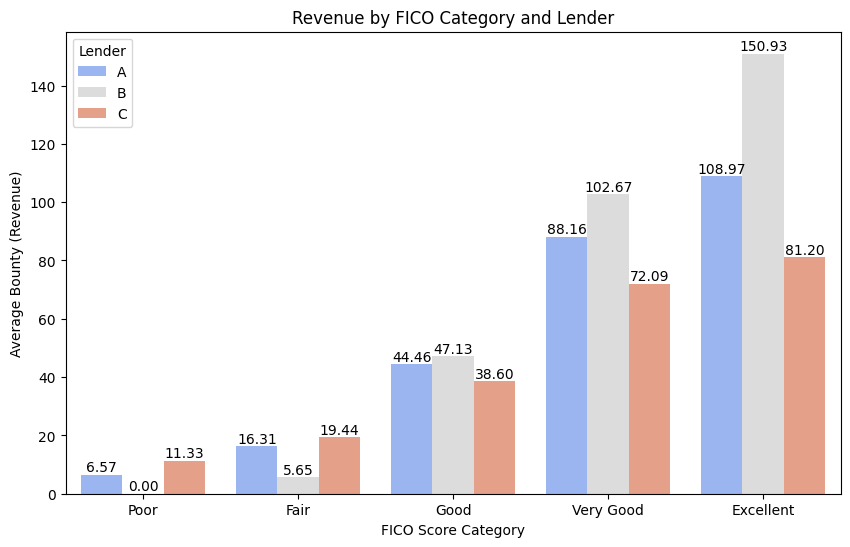

In [ ]:
# Analyze revenue and approval rates by lender
lender_revenue = df.groupby('Lender').agg({
    'bounty': 'mean',
    'Approved': 'mean'
}).reset_index()

lender_revenue.columns = ['Lender', 'Average_Bounty', 'Approval_Rate']
print("Lender Revenue and Approval Rates:")
print(lender_revenue)

# Categorize FICO Scores
fico_bins = [300, 579, 669, 739, 799, 850]  # Define FICO score ranges
fico_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']  # Label categories
df['FICO_Category'] = pd.cut(df['FICO_score'], bins=fico_bins, labels=fico_labels)

# Calculate revenue and approval rates by FICO Category and Lender
revenue_by_fico = df.groupby(['FICO_Category', 'Lender']).agg({
    'bounty': 'mean',
    'Approved': 'mean'
}).reset_index()

print("Revenue and Approval Rates by FICO Category and Lender:")
print(revenue_by_fico)

# Identify the Optimal Lender for Each FICO Category

max_revenue_lender = revenue_by_fico.loc[revenue_by_fico.groupby('FICO_Category')['bounty'].idxmax()]
print("Optimal Lender for Each FICO Category (Maximizing Revenue):")
print(max_revenue_lender)

# Visualize Revenue by FICO Category and Lender

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='FICO_Category', y='bounty', hue='Lender', data=revenue_by_fico, palette='coolwarm')
plt.title("Revenue by FICO Category and Lender")
plt.xlabel("FICO Score Category")
plt.ylabel("Average Bounty (Revenue)")
plt.legend(title="Lender")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()


## Insights:

- **Poor FICO Scores:** Customers align best with **Lender C**, maximizing revenue in this high-risk group.
- **Fair FICO Scores:** Customers align best with **Lender C**, offering the highest payouts in this moderate-risk category.
- **Good FICO Scores:** Customers align best with **Lender B**, generating higher revenue due to moderate-risk tolerance.
- **Very Good to Excellent FICO Scores:** Customers align best with **Lender B**, offering the highest payouts for low-risk customers.


In [ ]:
print(max_revenue_lender)

   FICO_Category Lender      bounty  Approved
2           Poor      C   11.330395  0.075536
5           Fair      C   19.441654  0.129611
7           Good      B   47.131931  0.134663
10     Very Good      B  102.669235  0.293341
13     Excellent      B  150.927357  0.431221


In [ ]:
# Directly sum the bounty of approved applications
current_revenue = df[df['Approved'] == 1]['bounty'].sum()

# Calculate Total Revenue by Lender for Approved Applications
approved_applications = df[df['Approved'] == 1]

# Group by FICO category and lender, calculate total bounty
total_bounty_by_lender = approved_applications.groupby(['FICO_Category', 'Lender']).agg({
    'bounty': 'sum',  # Total bounty for each lender in each FICO category
}).reset_index()

# Find the Best Lender by Total Revenue for Each FICO Category
best_lender_per_fico = total_bounty_by_lender.loc[
    total_bounty_by_lender.groupby('FICO_Category')['bounty'].idxmax()
]

# Merge the Best Lender's Bounty with Approved Applications
approved_applications = approved_applications.merge(
    best_lender_per_fico[['FICO_Category', 'Lender', 'bounty']],
    on=['FICO_Category', 'Lender'],
    how='left',
    suffixes=('', '_optimal')
)

# Calculate Optimal Revenue
optimal_revenue = approved_applications['bounty_optimal'].sum()

# Calculate Incremental Revenue
incremental_revenue = optimal_revenue - current_revenue

print(f"Current Revenue: ${current_revenue:.2f}")
print(f"Optimal Revenue: ${optimal_revenue:.2f}")
print(f"Incremental Revenue: ${incremental_revenue:.2f}")

print("Best Lender by FICO Category:")
print(best_lender_per_fico)


Current Revenue: $2641500.00
Optimal Revenue: $2795916750.00
Incremental Revenue: $2793275250.00
Best Lender by FICO Category:
   FICO_Category Lender  bounty
0           Poor      A  101250
3           Fair      A  319000
6           Good      A  716000
9      Very Good      A  237250
12     Excellent      A  134250


<ipython-input-86-9b1ffdaa8001>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bounty_by_lender = approved_applications.groupby(['FICO_Category', 'Lender']).agg({
<ipython-input-86-9b1ffdaa8001>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bounty_by_lender.groupby('FICO_Category')['bounty'].idxmax()


<ipython-input-87-0641c31236b8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_loan = df.groupby(['Loan_Category', 'Lender']).agg({


Revenue and Approval Rates by Loan Amount and Lender:
  Loan_Category Lender     bounty  Approved
0         Small      A  30.898701  0.123595
1         Small      B  27.450114  0.078429
2         Small      C  30.005924  0.200039
3        Medium      A  27.569510  0.110278
4        Medium      B  26.696762  0.076276
5        Medium      C  26.183218  0.174555
6         Large      A  24.201663  0.096807
7         Large      B  20.925320  0.059787
8         Large      C  20.892495  0.139283


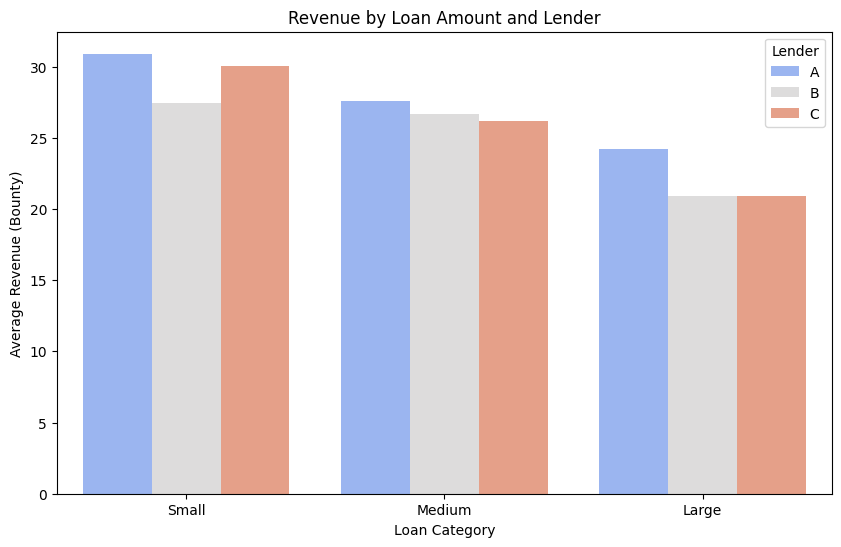

In [ ]:
# Create Loan Amount Categories
loan_bins = [5000, 20000, 50000, 100000]
loan_labels = ['Small', 'Medium', 'Large']
df['Loan_Category'] = pd.cut(df['Loan_Amount'], bins=loan_bins, labels=loan_labels)

# Calculate revenue by Loan Amount and Lender
revenue_by_loan = df.groupby(['Loan_Category', 'Lender']).agg({
    'bounty': 'mean',
    'Approved': 'mean'
}).reset_index()

print("Revenue and Approval Rates by Loan Amount and Lender:")
print(revenue_by_loan)

# Visualization of Revenue by Loan Amount and Lender
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Category', y='bounty', hue='Lender', data=revenue_by_loan, palette='coolwarm')
plt.title("Revenue by Loan Amount and Lender")
plt.xlabel("Loan Category")
plt.ylabel("Average Revenue (Bounty)")
plt.legend(title="Lender")
plt.show()



## **Customer-Lender Match Recommendations:**

- **Small Loans:**  
  - **Best Fit:** **Lender A or Lender C**  
  - **Reason:** Lender A has the highest average bounty (`30.89`), followed closely by Lender C (`30.01`). Lender C also offers the highest approval rate (`20.0%`) for this category.

- **Medium Loans:**  
  - **Best Fit:** **Lender A**  
  - **Reason:** Lender A leads with the highest average bounty (`27.57`) and a slightly higher approval rate (`11.0%`) compared to Lenders B and C.

- **Large Loans:**  
  - **Best Fit:** **Lender A**  
  - **Reason:** Lender A generates the highest average bounty (`24.20`) and offers the best balance of revenue and approval rates.

---

## **Considerations for Real-Time Matching:**

1. **Loan Size Alignment:** Ensure loan sizes match lender preferences to optimize revenue and approval rates.
2. **Data Availability:** Regularly update customer profiles with accurate loan requests, income, and credit data.
3. **Algorithm Scalability:** Implement scalable systems to handle large datasets and perform real-time matching.

---
